# descriptive analyses by journal

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from google.colab import drive

drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/scientometrics')

print("Current Working Directory:", os.getcwd())

Mounted at /content/drive
Current Working Directory: /content/drive/My Drive/scientometrics


## gender diversity

### plot by journal

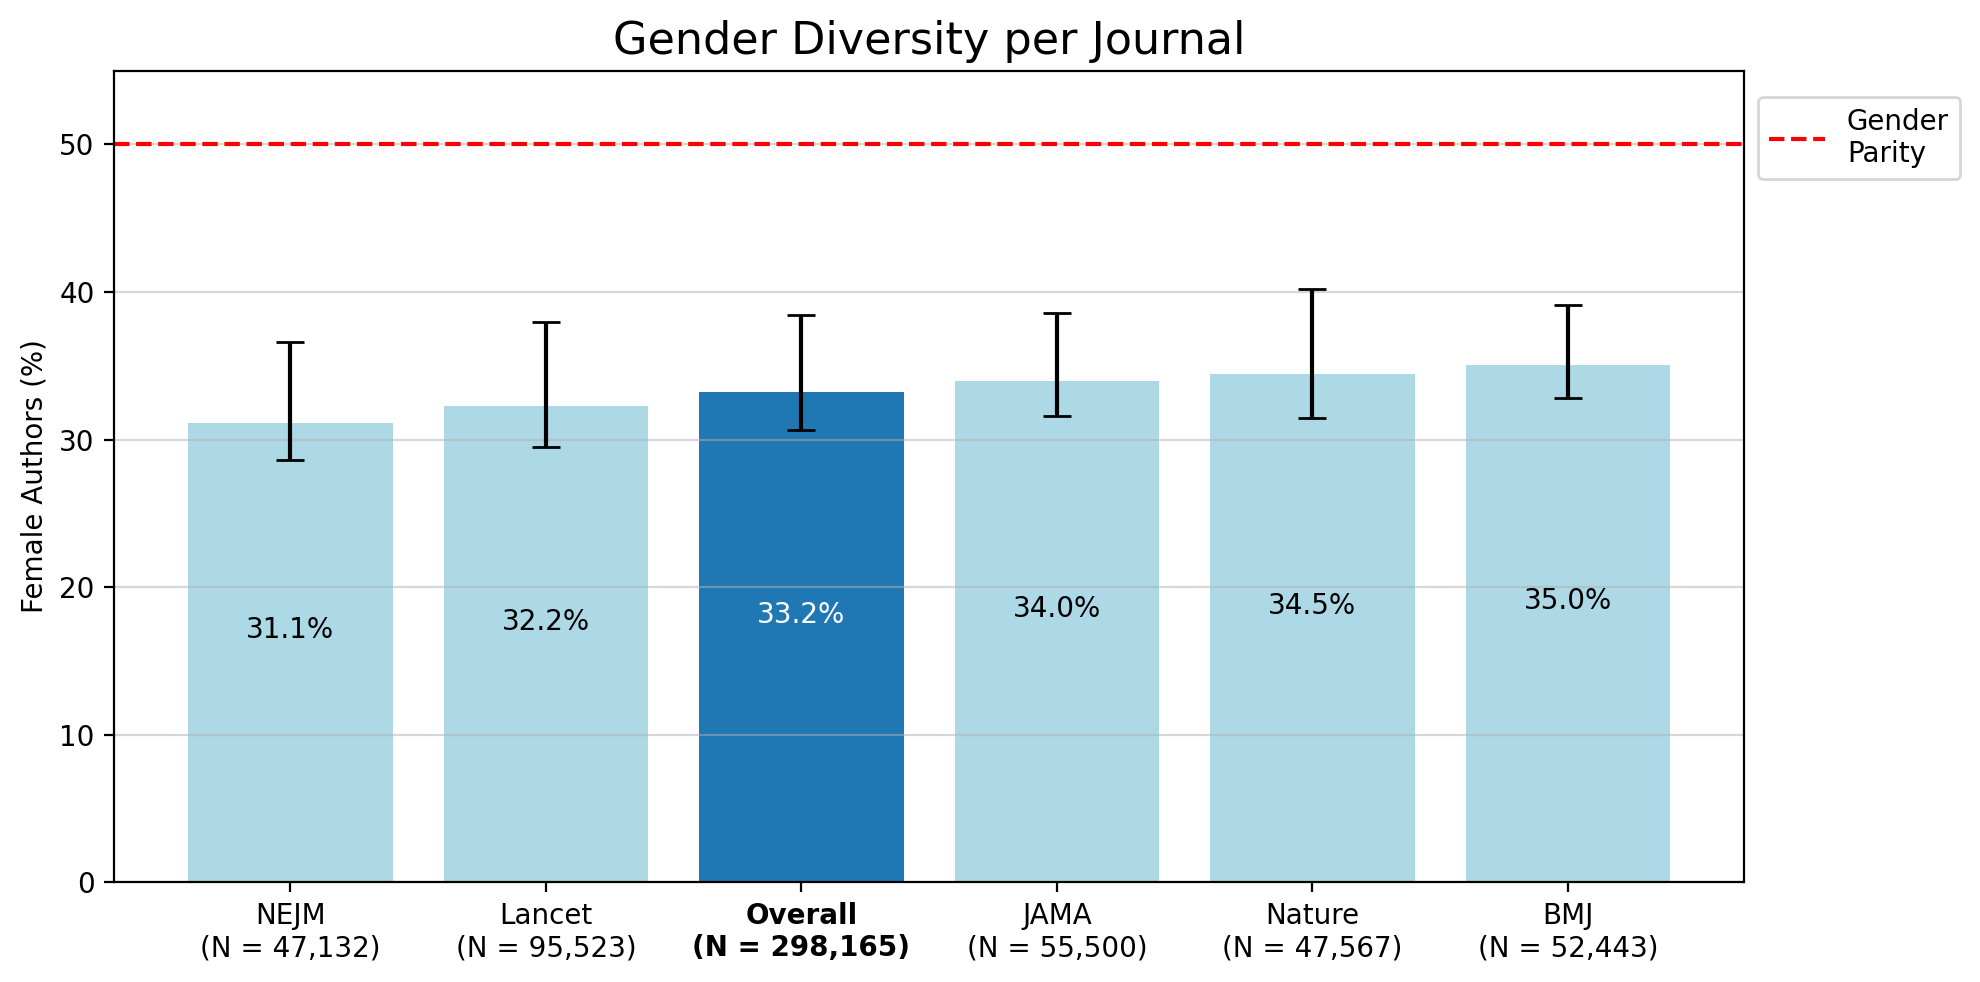

(Max 50 authors)




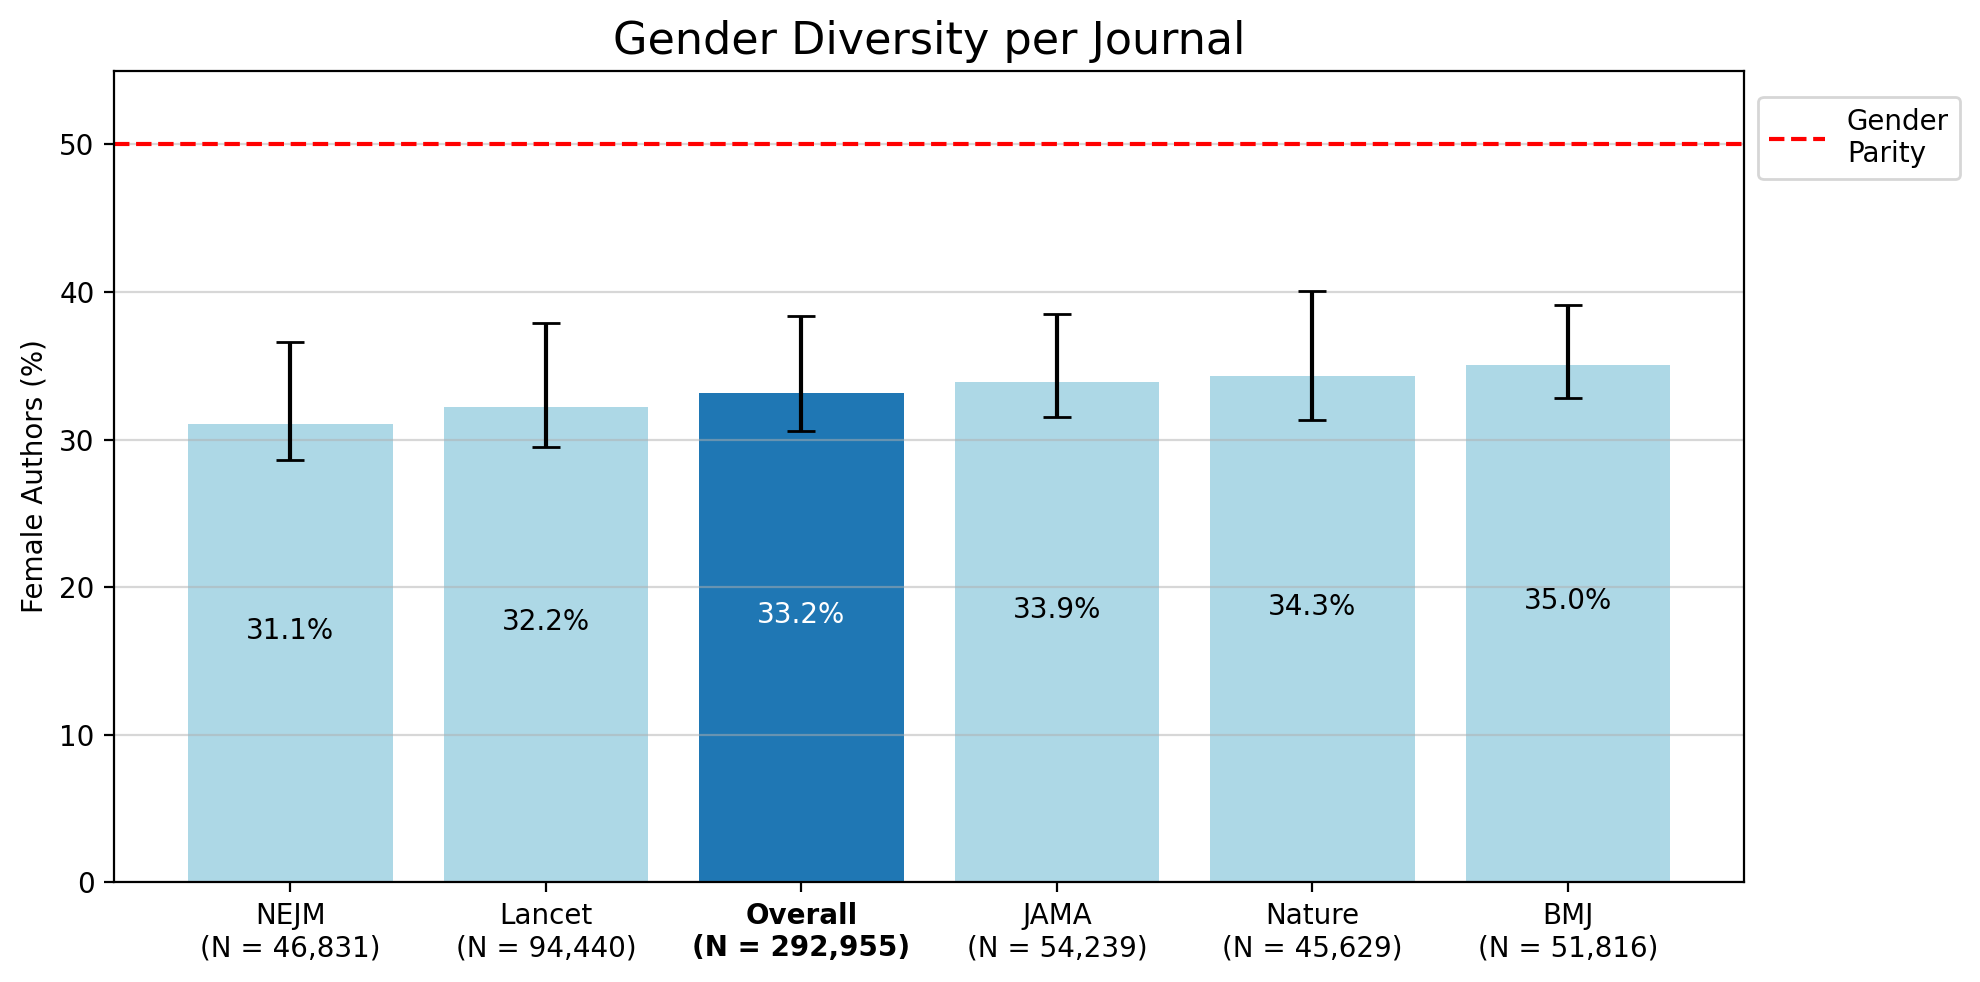

(Max 40 authors)




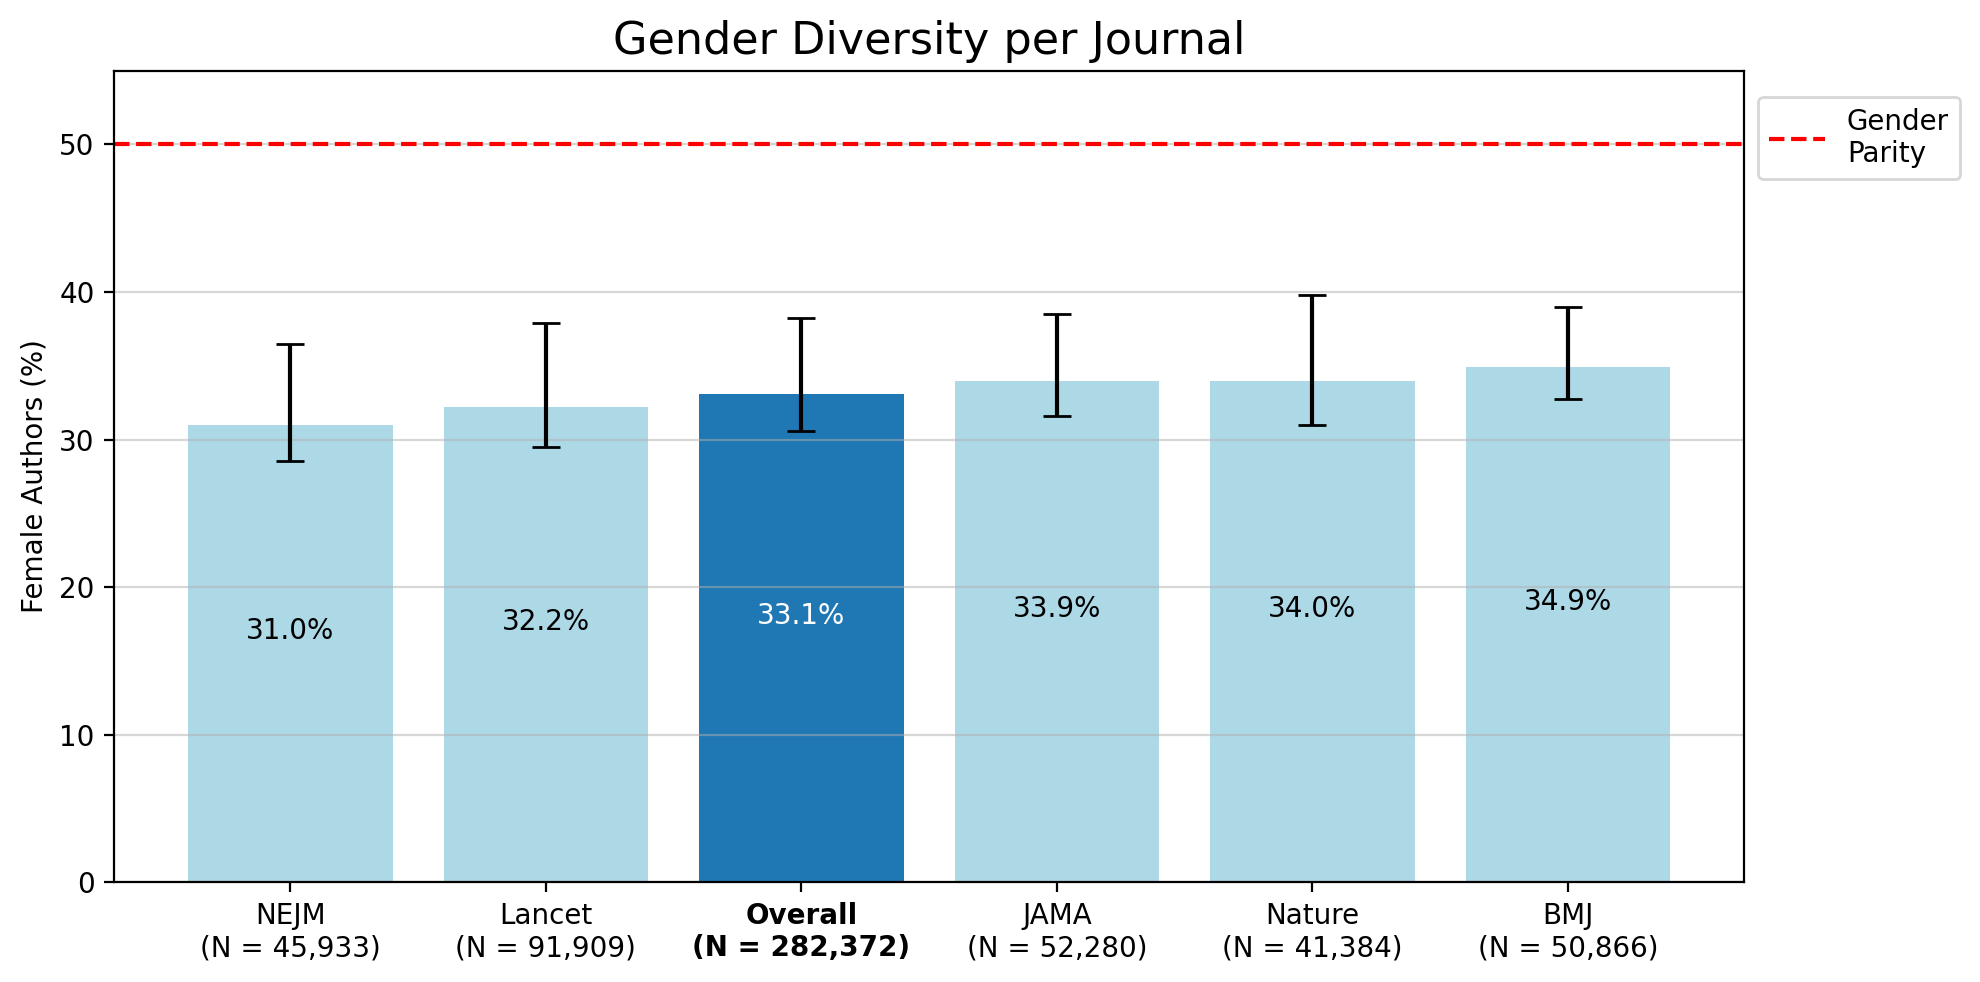

(Max 30 authors)




In [2]:
maxs = [50, 40, 30]

gds = {}

for max_ in maxs:
    scenarios = ["clean", "clean/gender_opti", "clean/gender_pessi"]
    columns = ["normal", "optimistic", "pessimistic"]

    gender_diversity = pd.DataFrame()  # Initialize an empty DataFrame

    for sce, col in zip(scenarios, columns):
        df = pd.read_csv(f"{sce}/max_{max_}_authors.csv")
        df = df[df.journal != "PLOS Medicine"]

        overall_pct_female = df.gender.value_counts(normalize=True).get(1, 0)  # Calculate the overall percentage

        journal_dict = {}
        count_dict = {}

        for journal in df.journal.unique():
            df_j = df[df.journal == journal]
            pct_female = df_j.gender.value_counts(normalize=True).get(1, 0)
            journal_dict[journal] = pct_female
            count_dict[journal] = len(df_j)

        # Adding overall numbers
        journal_dict["Overall"] = overall_pct_female
        count_dict["Overall"] = len(df)

        temp_df = pd.DataFrame.from_dict(journal_dict, orient='index', columns=[col])

        if gender_diversity.empty:
            gender_diversity = temp_df
        else:
            gender_diversity = gender_diversity.join(temp_df)

    # Custom sort to make "Overall" appear last in plot
    gender_diversity = gender_diversity.sort_values(by='normal', key=lambda col: col.replace("Overall", "Z"))*100

    # Rename index names
    renamed_index = {
        "New England Journal of Medicine": "NEJM",
        "PLOS Medicine": "PLoS",
        "The Lancet": "Lancet",
        "JAMA": "JAMA",
        "The BMJ": "BMJ",
        "Nature Medicine": "Nature"
    }

    # Use counts to annotate the x labels
    x_labels = [f"{renamed_index.get(journal, journal)}\n(N = {format(count_dict.get(journal, 0), ',')})" for journal in gender_diversity.index]

    # Calculate error bars
    gender_diversity['lower_error'] = gender_diversity['normal'] - gender_diversity['pessimistic']
    gender_diversity['upper_error'] = gender_diversity['optimistic'] - gender_diversity['normal']
    errors = [gender_diversity['lower_error'], gender_diversity['upper_error']]

    # Specify different colors and alphas for the "Overall" bar
    colors = ['lightblue' if i != "Overall" else 'tab:blue' for i in gender_diversity.index]

    plt.figure(figsize=[10, 5])
    bars = plt.bar(gender_diversity.index, gender_diversity['normal'], yerr=errors,
                   color=colors, align='center', ecolor='black', capsize=5, linewidth=1)

    for i, bar in enumerate(bars):
        if i == 2:
          c = 'white'
        else:
          c = 'black'
        yval = bar.get_height()
        plt.annotate(f'{yval:.1f}%',  # format the value to 2 decimal places
                     (bar.get_x() + bar.get_width() / 2, yval/2),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     color=c,
                     ha='center', va='bottom')

    plt.xticks(rotation='vertical')

    plt.xticks(rotation='vertical')
    # plt.xlabel('Journal')
    plt.ylabel('Female Authors (%)')
    plt.title(f'Gender Diversity per Journal', fontsize=16)
    plt.ylim(0, 55)
    fair_line = plt.axhline(y=50, color='r', linestyle='--', label='Gender\nParity')
    plt.grid(axis='y', alpha=0.5)
    plt.xticks(rotation=0)
    plt.xticks(ticks=range(len(x_labels)), labels=x_labels)

    ax = plt.gca()  # get the current axis
    for label in ax.get_xticklabels():
      if re.search(r'Overall', label.get_text()):
        label.set_weight('bold')
    plt.legend(handles=[fair_line], loc='upper left', bbox_to_anchor=(1, .985))
    plt.tight_layout()
    plt.show()

    print(f"(Max {max_} authors)")
    print('\n')

    gds[max_] = gender_diversity


In [3]:
gds[30][['normal', 'optimistic','pessimistic']].round(3)*100

,normal,optimistic,pessimistic
New England Journal of Medicine,3100.5,3644.4,2856.1
The Lancet,3220.4,3787.1,2951.2
Overall,3309.1,3823.9,3054.5
JAMA,3393.8,3849.1,3159.9
Nature Medicine,3399.0,3981.0,3099.3
The BMJ,3493.2,3898.5,3275.7


In [4]:
gds[40][['normal', 'optimistic','pessimistic']].round(3)*100

,normal,optimistic,pessimistic
New England Journal of Medicine,3107.6,3657.6,2859.6
The Lancet,3220.7,3791.3,2949.6
Overall,3317.1,3835.8,3059.6
JAMA,3387.8,3847.6,3152.2
Nature Medicine,3432.3,4009.5,3130.7
The BMJ,3502.5,3912.5,3281.4


In [5]:
gds[50][['normal', 'optimistic','pessimistic']].round(3)*100

,normal,optimistic,pessimistic
New England Journal of Medicine,3110.5,3661.0,2862.0
The Lancet,3224.0,3797.2,2951.2
Overall,3323.0,3843.2,3064.1
JAMA,3395.5,3859.1,3157.1
Nature Medicine,3445.9,4021.7,3143.1
The BMJ,3502.0,3911.9,3281.1


### overall, with PLOS

In [6]:
print("6 journals, with PLOS Medicine")
# Agglomerate results
maxs = [30, 40, 50]

for max_ in maxs:
    scenarios = ["clean", "clean/gender_opti", "clean/gender_pessi"]
    columns = ["normal", "optimistic", "pessimistic"]

    # initialize an empty DataFrame
    gender_diversity = pd.DataFrame()

    for sce, col in zip(scenarios, columns):
        df = pd.read_csv(f"{sce}/max_{max_}_authors" ".csv")

        pct_female = df.gender.value_counts(normalize=True)[1]*100

        # create a temporary dataframe from the dictionary
        temp_df = pd.DataFrame.from_dict({'all': pct_female}, orient='index', columns=[col])

        if gender_diversity.empty:
            # if the main dataframe is still empty (i.e., this is the first iteration), copy the temporary one
            gender_diversity = temp_df
        else:
            # else, join the new data with the existing dataframe
            gender_diversity = gender_diversity.join(temp_df)

    print(f"Max {max_} authors: {gender_diversity.loc['all'].normal:.2f} ({gender_diversity.loc['all'].pessimistic:.2f} - {gender_diversity.loc['all'].optimistic:.2f}) %")

6 journals, with PLOS Medicine
Max 30 authors: 33.09 (30.97 - 38.79) %
Max 40 authors: 33.17 (31.02 - 38.90) %
Max 50 authors: 33.23 (31.06 - 38.98) %


### overall, without PLOS

In [7]:
print("5 journals, without PLOS Medicine")

# Agglomerate results
maxs = [30, 40, 50]

for max_ in maxs:
    scenarios = ["clean", "clean/gender_opti", "clean/gender_pessi"]
    columns = ["normal", "optimistic", "pessimistic"]

    # initialize an empty DataFrame
    gender_diversity = pd.DataFrame()

    for sce, col in zip(scenarios, columns):
        df = pd.read_csv(f"{sce}/max_{max_}_authors" ".csv")
        df = df[df.journal != "PLOS Medicine"]

        pct_female = df.gender.value_counts(normalize=True)[1]*100

        # create a temporary dataframe from the dictionary
        temp_df = pd.DataFrame.from_dict({'all': pct_female}, orient='index', columns=[col])

        if gender_diversity.empty:
            # if the main dataframe is still empty (i.e., this is the first iteration), copy the temporary one
            gender_diversity = temp_df
        else:
            # else, join the new data with the existing dataframe
            gender_diversity = gender_diversity.join(temp_df)

    print(f"Max {max_} authors: {gender_diversity.loc['all'].normal:.2f} ({gender_diversity.loc['all'].pessimistic:.2f} - {gender_diversity.loc['all'].optimistic:.2f}) %")


5 journals, without PLOS Medicine
Max 30 authors: 33.09 (30.55 - 38.24) %
Max 40 authors: 33.17 (30.60 - 38.36) %
Max 50 authors: 33.23 (30.64 - 38.43) %


## geographical diversity

In [8]:
# prep

maxs = [30]#, 40, 50]
scenarios = ["clean", "clean/lmic_opti", "clean/lmic_pessi"]
columns = ["normal", "optimistic", "pessimistic"]

# Initialize an empty list to store the data
data = []

# Iterate over each maximum
for max_ in maxs:
    # Iterate over each scenario and column
    for sce, col in zip(scenarios, columns):
        # Load the data
        df = pd.read_csv(f"{sce}/max_{max_}_authors" ".csv")
        df = df[df.journal != "PLOS Medicine"]

        # Iterate over each unique journal
        for journal in df.journal.unique():
            # Filter the data for the current journal
            df_j = df[df.journal == journal]

            # Group by paper and get count and sum of LMIC in different columns
            df_papers = df_j.groupby('pub_id').agg({'LMIC': ['count', 'sum']})
            df_papers['all_LMIC'] = df_papers.apply(lambda row: row.LMIC['count'] == row.LMIC['sum'], axis=1)
            df_papers['all_HIC'] = df_papers.apply(lambda row: row.LMIC['sum'] == 0, axis=1)
            df_papers['mix_LMIC_HIC'] = df_papers.apply(lambda row: row.LMIC['count'] != row.LMIC['sum'], axis=1)

            # Calculate the percentages
            pct_all_HIC = df_papers.all_HIC.value_counts(normalize=True).loc[True] * 100
            pct_all_LMIC = df_papers.all_LMIC.value_counts(normalize=True).loc[True] * 100
            pct_mix_LMIC_HIC = 100 - pct_all_HIC - pct_all_LMIC

            # Append the data to the list
            data.append([max_, col, journal, pct_all_LMIC, pct_all_HIC, pct_mix_LMIC_HIC])

# Convert the list to a DataFrame
df_final = pd.DataFrame(data, columns=['max', 'scenario', 'journal', 'pct_all_LMIC', 'pct_all_HIC', 'pct_mix_LMIC_HIC'])

# rename index names
df_final.journal = df_final.journal.map({"New England Journal of Medicine": "NEJM",
                                       "PLOS Medicine": "PLoS",
                                       "The Lancet": "Lancet",
                                       "JAMA": "JAMA",
                                       "The BMJ": "BMJ",
                                       "Nature Medicine": "Nature"})

In [9]:
df_final

,max,scenario,journal,pct_all_LMIC,pct_all_HIC,pct_mix_LMIC_HIC
0,30,normal,JAMA,1.608335,93.576775,4.814890
1,30,normal,Lancet,8.304878,72.548780,19.146341
2,30,normal,BMJ,2.787214,90.375403,6.837384
3,30,normal,NEJM,4.781404,88.522221,6.696375
4,30,normal,Nature,1.867894,88.142934,9.989172
5,30,optimistic,JAMA,1.608335,89.146267,9.245398
6,30,optimistic,Lancet,8.304878,72.500000,19.195122
7,30,optimistic,BMJ,2.787214,88.049821,9.162965
8,30,optimistic,NEJM,4.781404,81.572925,13.645670
9,30,optimistic,Nature,1.867894,88.061722,10.070384


### plot by journal

Max: 30, Scenario: Normal


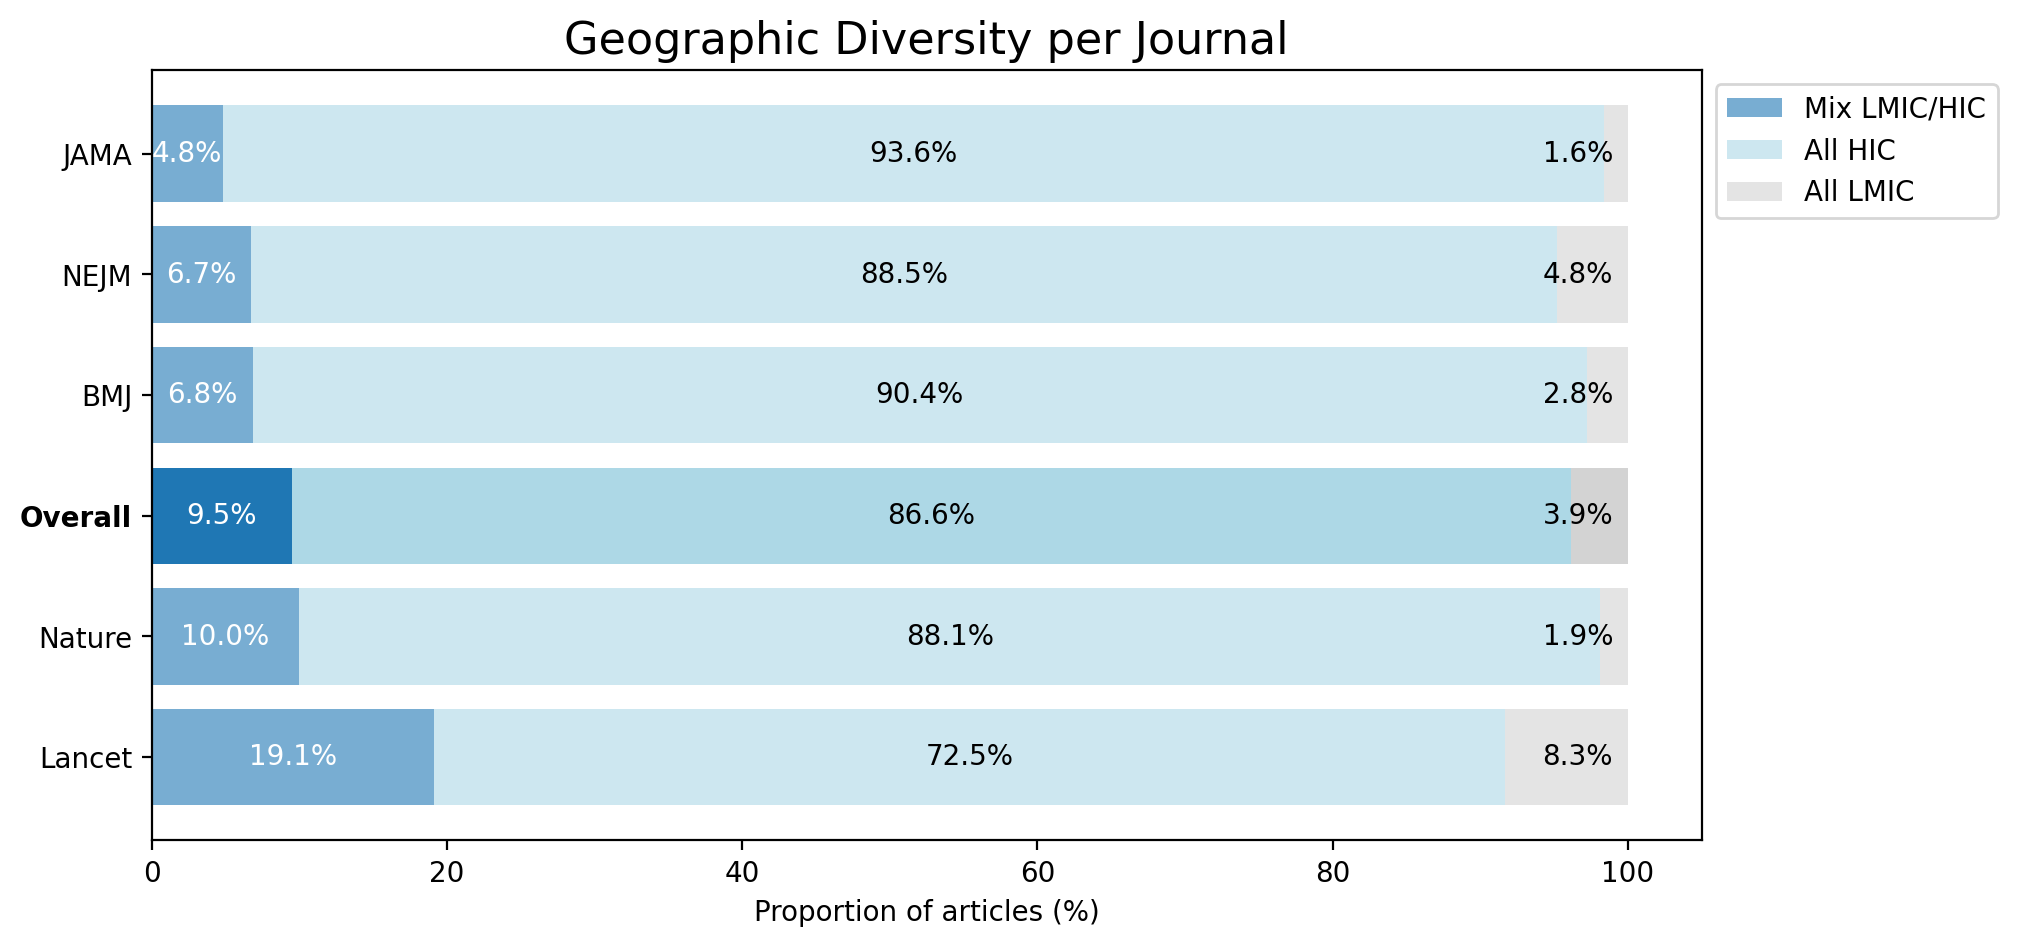

Max: 30, Scenario: Optimistic


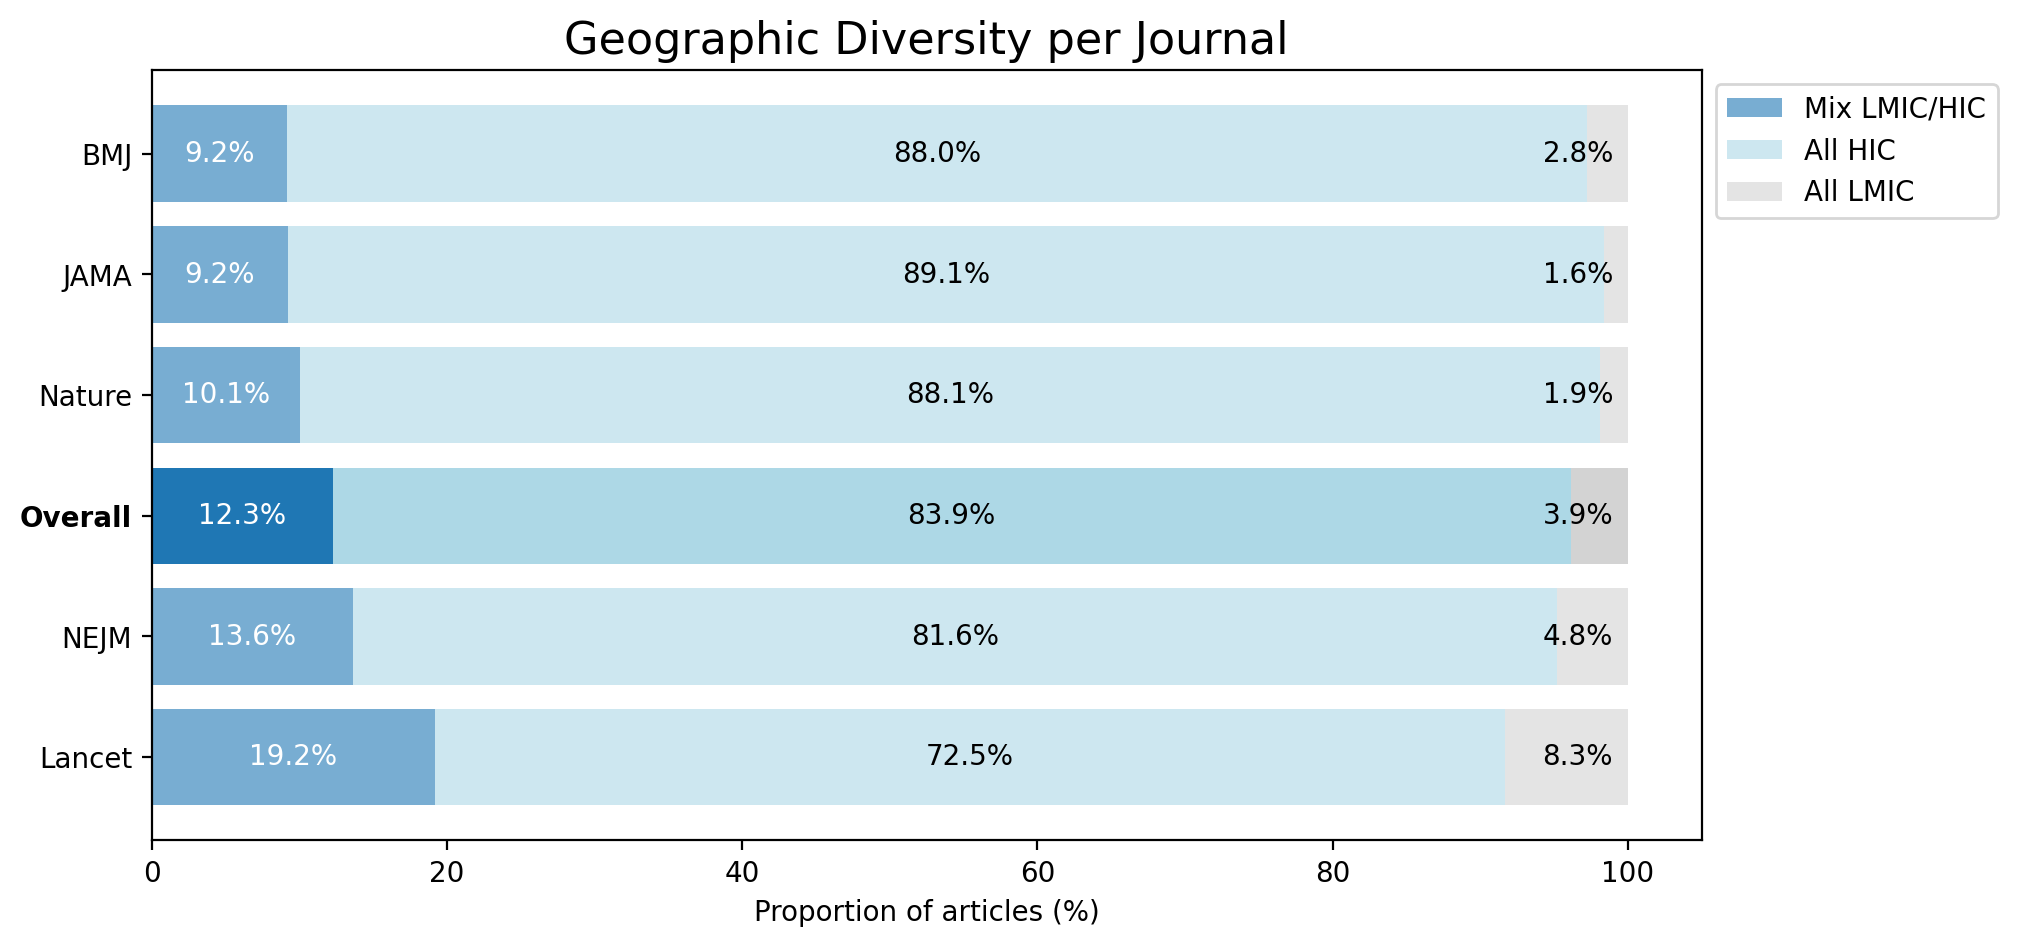

Max: 30, Scenario: Pessimistic


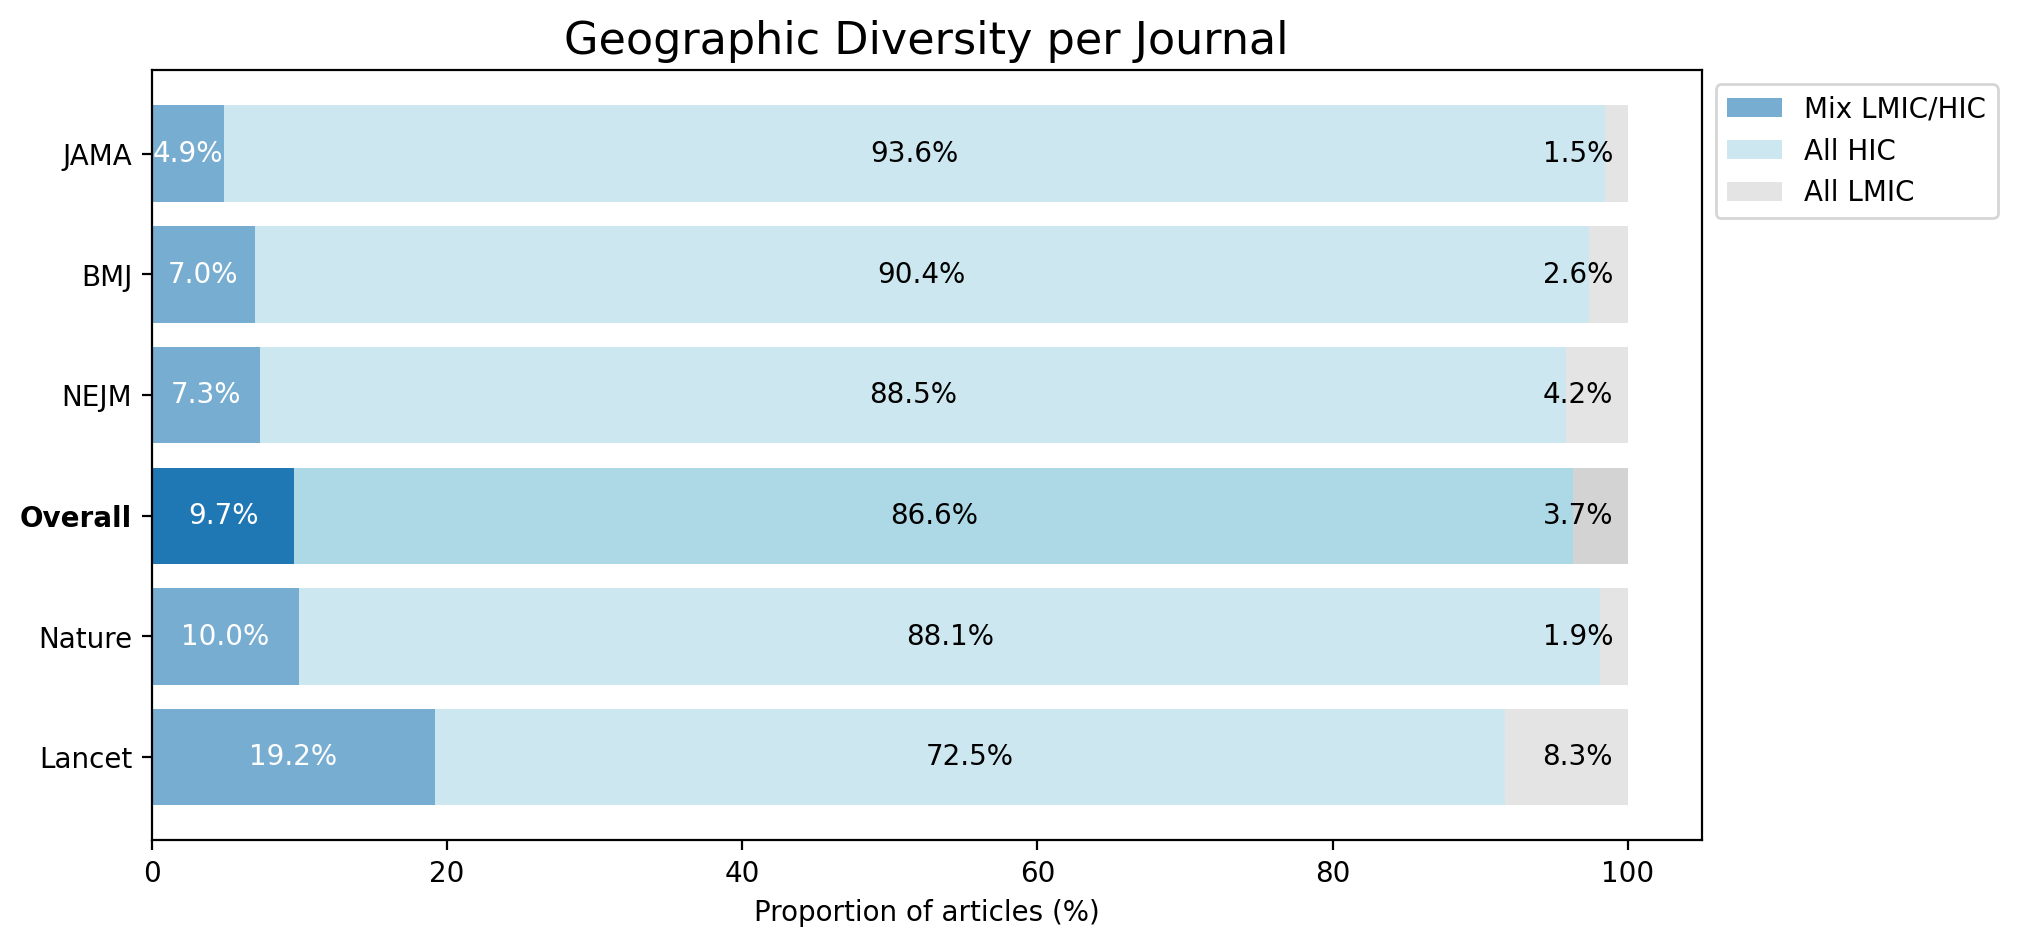

In [10]:
colors = ['tab:blue', 'lightblue', 'lightgrey']

# Get the unique max values and scenarios
maxs = df_final['max'].unique()
scenarios = df_final['scenario'].unique()

# Iterate over each unique max value
for max_ in maxs:
    # Filter the data for the current max value
    df_max = df_final[df_final['max'] == max_]

    # Iterate over each unique scenario
    for scenario in scenarios:
        # Filter the data for the current scenario
        df_scenario = df_max[df_max['scenario'] == scenario]

        # Sort by 'pct_mix_LMIC_HIC'
        df_scenario = df_scenario.sort_values(by='pct_mix_LMIC_HIC', ascending=False)

        # Calculate the overall values for each category
        overall_values = df_scenario[['pct_mix_LMIC_HIC', 'pct_all_HIC', 'pct_all_LMIC']].mean()
        overall_df = pd.DataFrame([overall_values])
        overall_df['journal'] = 'Overall'
        df_scenario = pd.concat([df_scenario, overall_df], ignore_index=True)

        # Sort again if needed
        df_scenario = df_scenario.sort_values(by='pct_mix_LMIC_HIC', ascending=False)

        # Reset index for easier plotting
        df_scenario.reset_index(inplace=True)

        journals = df_scenario['journal'].unique()

        # Create a figure and axes
        fig, ax = plt.subplots(figsize=(10, 5))

        # Iterate over each unique journal
        for i, (_, row) in enumerate(df_scenario.iterrows()):
          vars_ordered = ['pct_mix_LMIC_HIC', 'pct_all_HIC', 'pct_all_LMIC']
          cumsum = row[vars_ordered].cumsum()
          alpha_value = 1 if row['journal'] == 'Overall' else 0.6
          for j, var in enumerate(vars_ordered):
              if j == 0:
                  c = "white"
              else:
                  c = "black"

              ax.barh(i, row[var], left=cumsum[var] - row[var], color=colors[j], alpha=alpha_value)

              # Text alignment and position
              text_pos = cumsum[var] - row[var] / 2
              text_ha = "center"

              # For the last bar, adjust text position and alignment to be right-aligned
              if j == len(vars_ordered) - 1:
                  text_pos = 99 # cumsum[var] - row[var] + 2  # Adjust the +2 as needed
                  text_ha = "right"

              ax.text(text_pos, i, f"{row[var]:.1f}%", ha=text_ha, va='center', color=c, fontsize=10)

        ax.set_yticks(range(len(journals)))
        ax.set_yticklabels(journals)
        y_tick_labels = ax.set_yticklabels(journals)

        ax.set_xlabel('Proportion of articles (%)')
        print(f"Max: {max_}, Scenario: {scenario.title()}")
        ax.set_title(f'Geographic Diversity per Journal', fontsize=16)
        ax.legend(['Mix LMIC/HIC', 'All HIC', 'All LMIC'], loc='upper left', bbox_to_anchor=(1, 1))

        for label in y_tick_labels:
          if label.get_text() == 'Overall':
              label.set_weight('bold')

        plt.savefig(f"results/geographic/{max_}_{scenario}.png", bbox_inches='tight')
        plt.show()

In [66]:
x_labels

Max: 30, Scenario: Normal


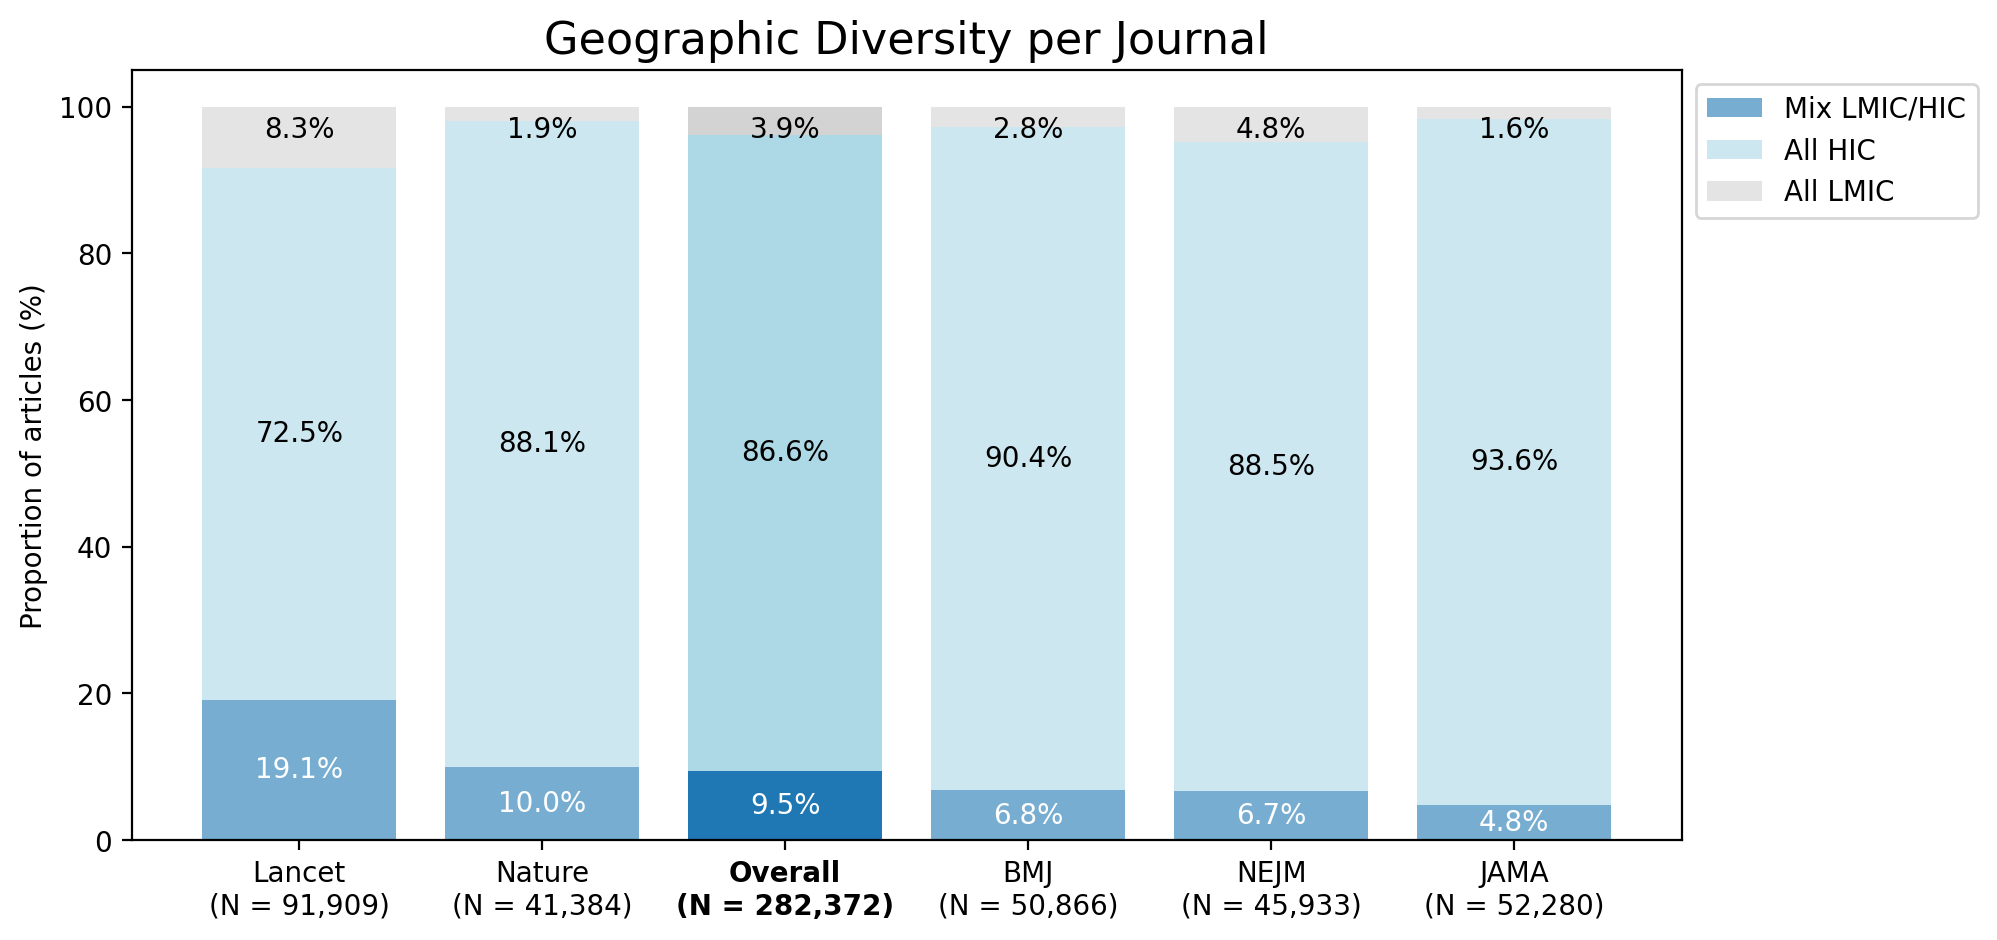

In [69]:
colors = ['tab:blue', 'lightblue', 'lightgrey']

# Assuming df_final is your DataFrame
# Get the unique max values and scenarios
maxs = df_final['max'].unique()
scenarios = df_final['scenario'].unique()

ordered_journals = df_final.loc[(df_final.scenario == "normal")] \
        .sort_values(by='pct_mix_LMIC_HIC', ascending=False) \
        .journal.values

reversed_index = {v: k for k, v in renamed_index.items()}


x_labels = [f"{renamed_index.get(journal, journal)}\
\n(N = {format(count_dict.get(reversed_index[journal], 0), ',')})" \
            for journal in ordered_journals]

x_labels.insert(2, 'Overall\n(N = 282,372)')

# Iterate over each unique max value
for max_ in maxs:
    # Filter the data for the current max value
    df_max = df_final[df_final['max'] == max_]

    # Iterate over each unique scenario
    for scenario in ['normal']:
        # Filter the data for the current scenario
        df_scenario = df_max[df_max['scenario'] == scenario]

        # Sort by 'pct_mix_LMIC_HIC'
        df_scenario = df_scenario.sort_values(by='pct_mix_LMIC_HIC', ascending=False)

        # Calculate the overall values for each category
        overall_values = df_scenario[['pct_mix_LMIC_HIC', 'pct_all_HIC', 'pct_all_LMIC']].mean()
        overall_df = pd.DataFrame([overall_values])
        overall_df['journal'] = 'Overall'
        df_scenario = pd.concat([df_scenario, overall_df], ignore_index=True)

        # Sort again if needed
        df_scenario = df_scenario.sort_values(by='pct_mix_LMIC_HIC', ascending=False)

        # Reset index for easier plotting
        df_scenario.reset_index(inplace=True)

        journals = df_scenario['journal'].unique()


        # Create a figure and axes
        fig, ax = plt.subplots(figsize=(10, 5))

        # Iterate over each unique journal
        for i, (_, row) in enumerate(df_scenario.iterrows()):
            vars_ordered = ['pct_mix_LMIC_HIC', 'pct_all_HIC', 'pct_all_LMIC']
            cumsum = row[vars_ordered].cumsum()
            alpha_value = 1 if row['journal'] == 'Overall' else 0.6
            for j, var in enumerate(vars_ordered):
                if j == 0:
                    c = "white"
                else:
                    c = "black"

                ax.bar(i, row[var], bottom=cumsum[var] - row[var], color=colors[j], alpha=alpha_value)

                # Text alignment and position
                text_pos = cumsum[var] - row[var] / 2
                text_va = "center"

                # For the last bar, adjust text position and alignment to be right-aligned
                if j == len(vars_ordered) - 1:
                    text_pos = cumsum[var] + row[var] / 2  # Adjust the +2 as needed
                    text_va = "bottom"

                ax.text(i, min(text_pos, 95), f"{row[var]:.1f}%", ha='center', va=text_va, color=c, fontsize=10, rotation=0)

        plt.xticks(ticks=range(len(x_labels)), labels=x_labels)

        ax = plt.gca()  # get the current axis
        for label in ax.get_xticklabels():
          if re.search(r'Overall', label.get_text()):
            label.set_weight('bold')

        ax.set_ylabel('Proportion of articles (%)')
        print(f"Max: {max_}, Scenario: {scenario.title()}")
        ax.set_title(f'Geographic Diversity per Journal', fontsize=16)
        ax.legend(['Mix LMIC/HIC', 'All HIC', 'All LMIC'], loc='upper left', bbox_to_anchor=(1, 1))


        plt.show()

## impact factors

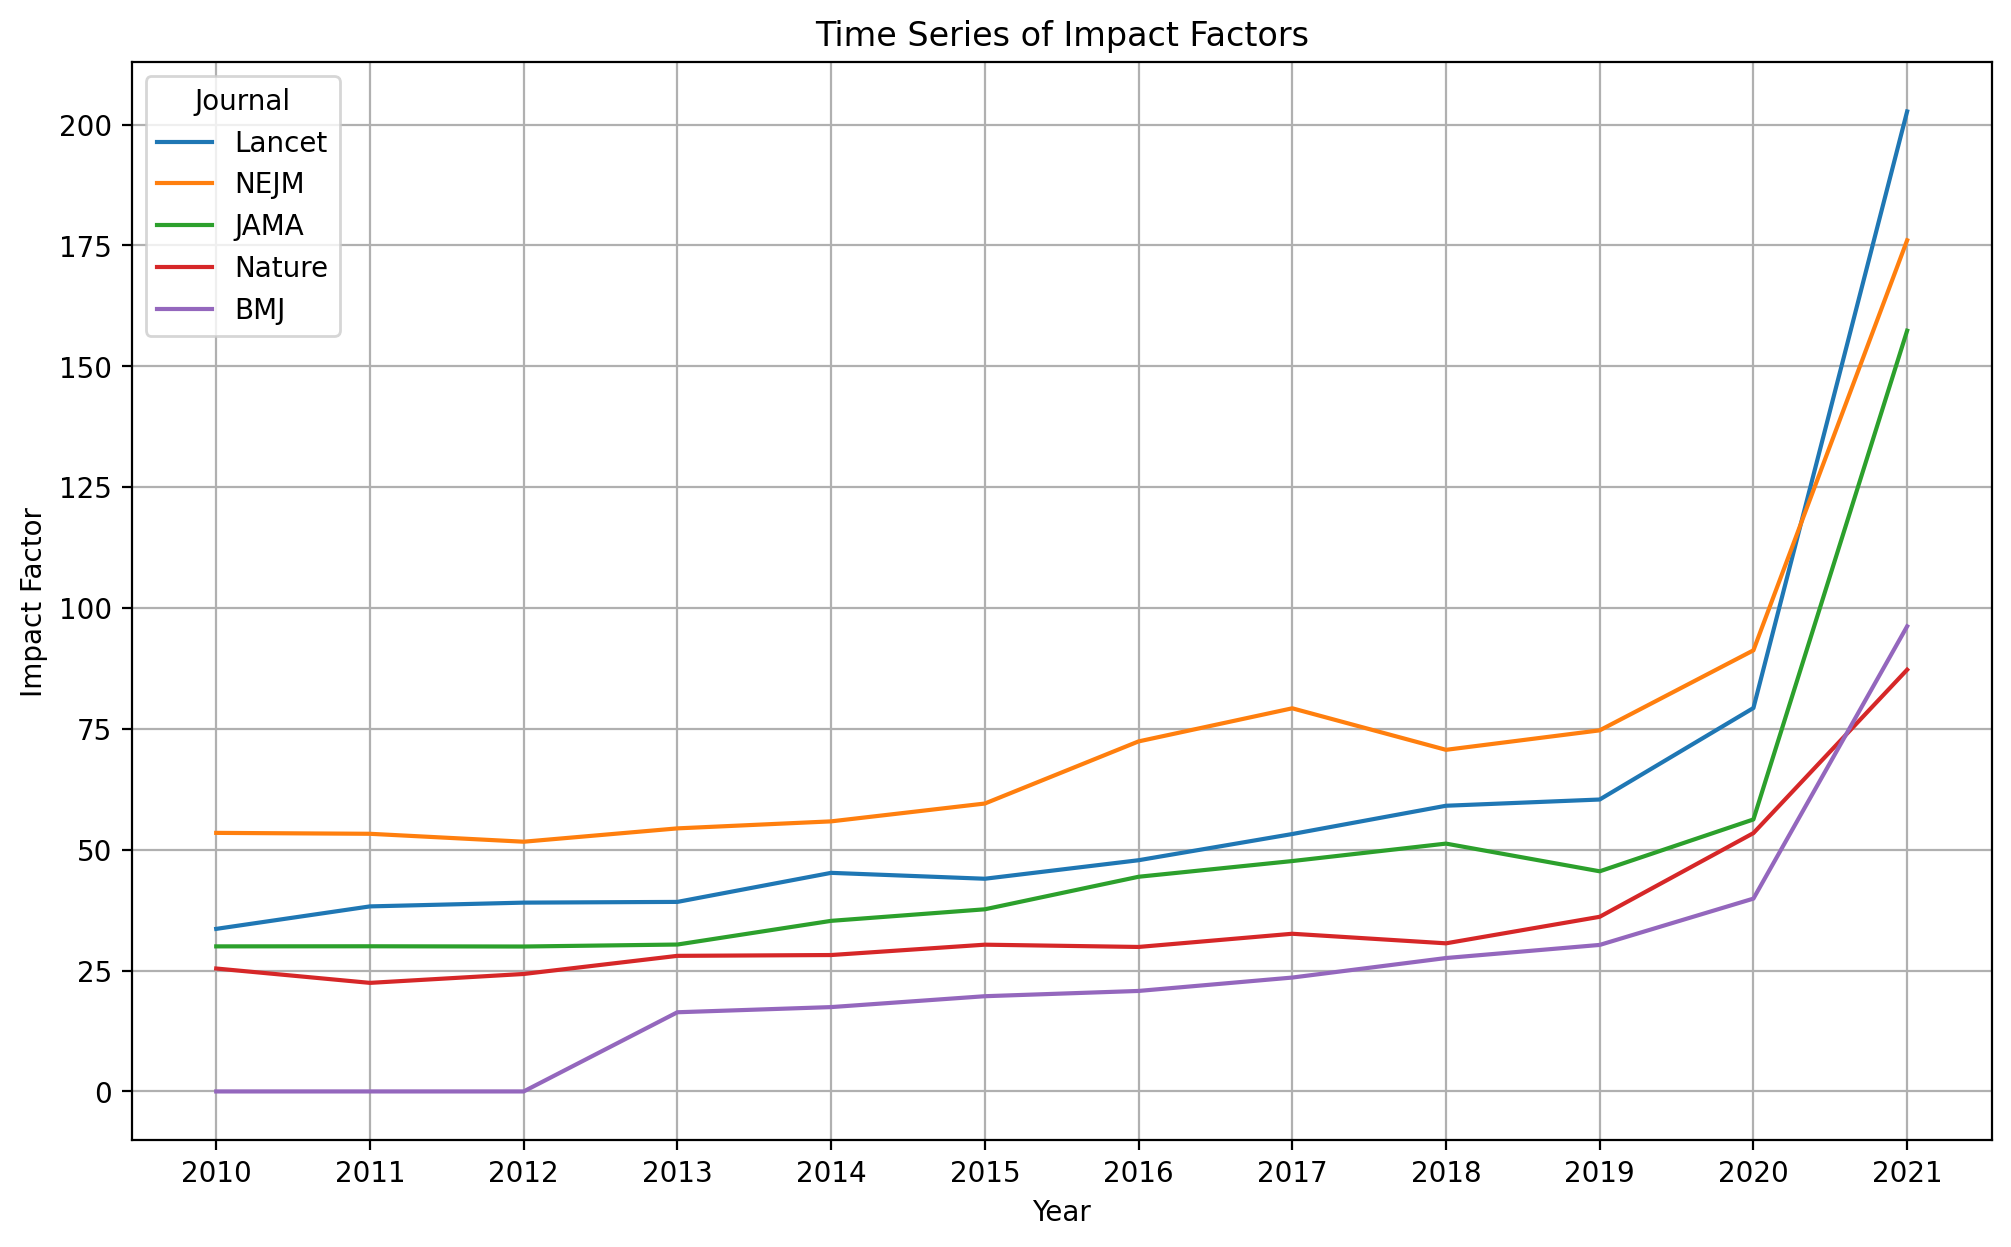

In [ ]:
url = "https://docs.google.com/spreadsheets/d/1i4WWVHDXxA4CUn9jXtQnw-DdP0IKqnS7WEg6k1HPINQ/export?format=csv"

# Read the data into a DataFrame
ifs = pd.read_csv(url)
ifs.columns = ifs.iloc[0].fillna('Year')
ifs = ifs[1:].reset_index(drop=True)
ifs.rename({'LANCET': 'Lancet'}, axis=1, inplace=True)
ifs.rename({'Nature Medicine': 'Nature'}, axis=1, inplace=True)
ifs = ifs.fillna(0)
ifs = ifs.sort_values(by='Year', ascending=True).set_index('Year')
ifs = ifs.applymap(lambda x: round(float(x), 2))

# Exclude PLOS Medicine
ifs = ifs[['Lancet', 'NEJM', 'JAMA', 'Nature', 'BMJ']]

plt.figure(figsize=(12, 7))

for col in ifs.columns:
    plt.plot(ifs.index, ifs[col], label=col)

plt.xlabel('Year')
plt.ylabel('Impact Factor')
plt.title('Time Series of Impact Factors')
plt.xticks(ifs.index)
plt.legend(title="Journal")
plt.grid(True)

plt.show()